In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
t = titles
titles.head()

,title,year
0,The Rising Son,1990
1,The Thousand Plane Raid,1969
2,Crucea de piatra,1993
3,Country,2000
4,Gaiking II,2011


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
c = cast
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,NaN
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### Using groupby(), plot the number of films that have been released each decade in the history of cinema.

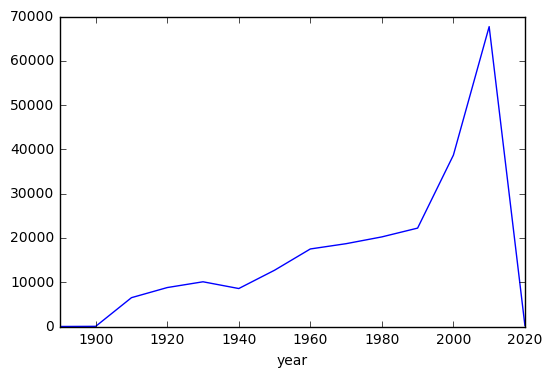

In [10]:
t.groupby(t.year//10*10).size().plot()

### Use groupby() to plot the number of "Hamlet" films made each decade.

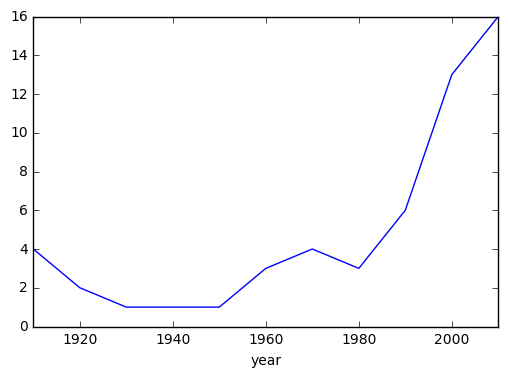

In [11]:
t[t.title.str.contains('Hamlet')].groupby(t.year//10*10).size().plot()

### How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

In [18]:
c[(c.n==1)&(c.year//10==195)].groupby(['year','type']).size()

year  type   
1950  actor      625
      actress    280
1951  actor      647
      actress    281
1952  actor      607
      actress    292
1953  actor      652
      actress    301
1954  actor      635
      actress    309
1955  actor      640
      actress    282
1956  actor      642
      actress    305
1957  actor      735
      actress    301
1958  actor      709
      actress    295
1959  actor      720
      actress    317
dtype: int64

### In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

In [16]:
c[(c.year//10==195)&(c.n>0)&(c.n<6)].groupby(['type','n']).size()

type     n  
actor    1.0    6612
         2.0    4561
         3.0    5585
         4.0    5591
         5.0    5607
actress  1.0    2963
         2.0    4554
         3.0    3144
         4.0    2844
         5.0    2544
dtype: int64

### Use groupby() to determine how many roles are listed for each of the Pink Panther movies.

In [29]:
c[c.title.str.contains('Pink Panther')].groupby('title').size()

title
Curse of the Pink Panther          67
Revenge of the Pink Panther        64
Son of the Pink Panther            46
The Pink Panther                  110
The Pink Panther 2                 84
The Pink Panther Strikes Again     68
The Return of the Pink Panther     30
Trail of the Pink Panther          41
dtype: int64

### List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [39]:
tmp = c[c.name=='Frank Oz'].groupby(['year','title']).size()
tmp[tmp > 1]

year  title                               
1979  The Muppet Movie                        8
1981  An American Werewolf in London          2
      The Great Muppet Caper                  6
1982  The Dark Crystal                        2
1984  The Muppets Take Manhattan              7
1985  Follow That Bird                        3
1992  The Muppet Christmas Carol              7
1996  Muppet Treasure Island                  4
1999  Muppets from Space                      4
      The Adventures of Elmo in Grouchland    3
dtype: int64

### List each of the characters that Frank Oz has portrayed at least twice.

In [42]:
tmp = c[c.name=='Frank Oz'].groupby('character').size()
tmp[tmp > 1].order()

/Users/cwoodson/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: order is deprecated, use sort_values(...)
  from ipykernel import kernelapp as app


character
Grover            2
Bert              3
Cookie Monster    3
Fozzie Bear       4
Sam the Eagle     5
Animal            6
Miss Piggy        6
Yoda              6
dtype: int64